# Clasificaciones usando muestra de tamaño 20000

In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc

In [2]:
sample = pd.read_pickle("data/ogle3_only/scaled/s20k.pkl.bz2")
sample["tile"] = sample["id"].apply(lambda i: "b" + str(i)[1:4])
sample["cls"] = sample.vs_type.apply(lambda x: 0 if x == "" else 1)

In [3]:
no_features = ["id", "vs_catalog", "vs_type", "ra_k", "dec_k", "tile", "cls"] 
X_columns = [c for c in sample.columns if c not in no_features]

grouped = sample.groupby("tile")
data = Container({k: grouped.get_group(k).copy() for k in grouped.groups.keys()})

del grouped, sample

## Features

In [4]:
cls = {0:0, 1:1}

In [5]:
d(X_columns)

1. cnt
2. Amplitude
3. AndersonDarling
4. Autocor_length
5. Beyond1Std
6. CAR_mean
7. CAR_sigma
8. CAR_tau
9. Con
10. Eta_e
11. FluxPercentileRatioMid20
12. FluxPercentileRatioMid35
13. FluxPercentileRatioMid50
14. FluxPercentileRatioMid65
15. FluxPercentileRatioMid80
16. Freq1_harmonics_amplitude_0
17. Freq1_harmonics_amplitude_1
18. Freq1_harmonics_amplitude_2
19. Freq1_harmonics_amplitude_3
20. Freq1_harmonics_rel_phase_0
21. Freq1_harmonics_rel_phase_1
22. Freq1_harmonics_rel_phase_2
23. Freq1_harmonics_rel_phase_3
24. LinearTrend
25. MaxSlope
26. Mean
27. Meanvariance
28. MedianAbsDev
29. MedianBRP
30. PairSlopeTrend
31. PercentAmplitude
32. PercentDifferenceFluxPercentile
33. PeriodLS
34. Period_fit
35. Psi_CS
36. Psi_eta
37. Q31
38. Rcs
39. Skew
40. SmallKurtosis
41. Std
42. StetsonK
43. c89_jk_color
44. c89_hk_color
45. c89_jh_color
46. n09_jk_color
47. n09_hk_color
48. n09_jh_color
49. c89_m2
50. c89_m4
51. c89_c3
52. n09_m2
53. n09_m4
54. n09_c3
55. AmplitudeH
56. AmplitudeJ
57. ppmb
58. AmplitudeJH
59. AmplitudeJK

## b278 - K-Folds

In [6]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.91      0.43      0.59       423

avg / total       0.99      0.99      0.99     20354

--------------------------------------------------------------------------------
CPU times: user 3min 11s, sys: 1.63 s, total: 3min 13s
Wall time: 3min 13s


In [7]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_poly = svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.85      0.40      0.55       423

avg / total       0.98      0.99      0.98     20354

--------------------------------------------------------------------------------
CPU times: user 2min 2s, sys: 1.24 s, total: 2min 3s
Wall time: 2min 4s


In [8]:
%%time
svc_rbf = KFoldExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls,
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_rbf = svc_rbf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.95      0.43      0.59       423

avg / total       0.99      0.99      0.99     20354

--------------------------------------------------------------------------------
CPU times: user 2min 29s, sys: 1.26 s, total: 2min 30s
Wall time: 2min 30s


In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     19931
        1.0       0.95      0.65      0.77       423

avg / total       0.99      0.99      0.99     20354

--------------------------------------------------------------------------------
CPU times: user 5min 33s, sys: 20 ms, total: 5min 33s
Wall time: 5min 33s


In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.87      0.35      0.49       423

avg / total       0.98      0.99      0.98     20354

--------------------------------------------------------------------------------
CPU times: user 1min 33s, sys: 4 ms, total: 1min 33s
Wall time: 1min 33s


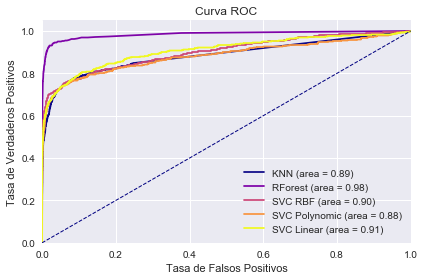

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC RBF": svc_rbf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

## b278 vs. Los demas

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.92      0.56      0.70       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.85      0.52      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19972
          1       0.85      0.57      0.68       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

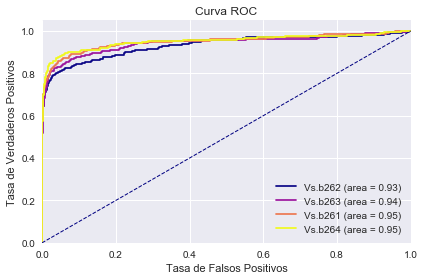

CPU times: user 1min 29s, sys: 1 s, total: 1min 30s
Wall time: 1min 30s


In [12]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.81      0.52      0.64       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19988
          1       0.76      0.49      0.60       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19972
          1       0.75      0.53      0.62       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

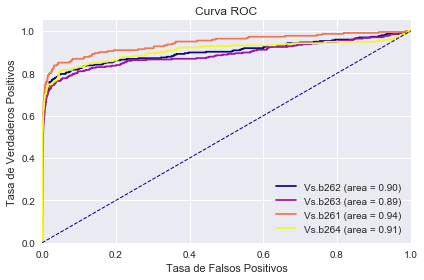

CPU times: user 58.2 s, sys: 560 ms, total: 58.7 s
Wall time: 58.4 s


In [13]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.93      0.53      0.68       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.88      0.50      0.64       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19972
          1       0.93      0.57      0.71       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

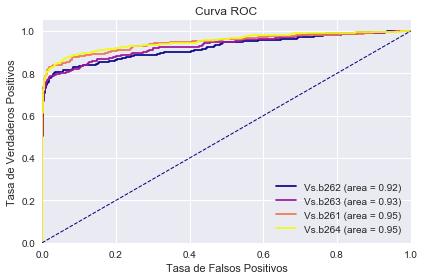

CPU times: user 1min 10s, sys: 424 ms, total: 1min 10s
Wall time: 1min 10s


In [14]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19951
          1       0.97      0.66      0.79       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.94      0.66      0.78       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19972
          1       0.96      0.75      0.84       221

avg / total       1.00      1.00      1.00     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

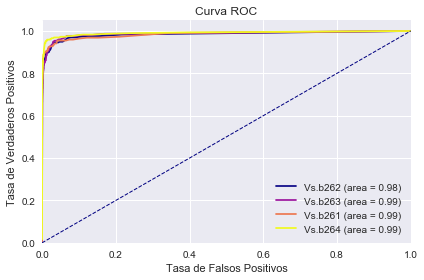

CPU times: user 2min 17s, sys: 728 ms, total: 2min 18s
Wall time: 2min 18s


In [15]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.83      0.44      0.57       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19988
          1       0.79      0.41      0.54       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19972
          1       0.76      0.52      0.62       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

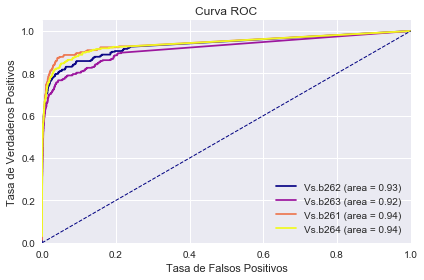

CPU times: user 7min 6s, sys: 312 ms, total: 7min 6s
Wall time: 7min 6s


In [16]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b278"))

## b261 vs. Los demas

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.92      0.55      0.69       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.85      0.52      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19931
          1       0.88      0.39      0.55       423

avg / total       0.99      0.99      0.98     20354

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

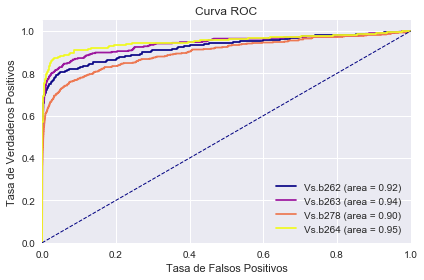

CPU times: user 37.2 s, sys: 320 ms, total: 37.6 s
Wall time: 37.2 s


In [17]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.94      0.47      0.62       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.89      0.47      0.61       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19931
          1       0.96      0.34      0.51       423

avg / total       0.99      0.99      0.98     20354

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

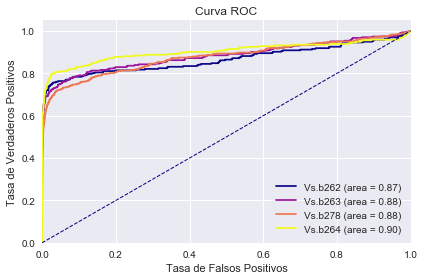

CPU times: user 28.6 s, sys: 264 ms, total: 28.8 s
Wall time: 28.5 s


In [18]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.49      0.65       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.90      0.49      0.63       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19931
          1       0.95      0.39      0.55       423

avg / total       0.99      0.99      0.98     20354

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

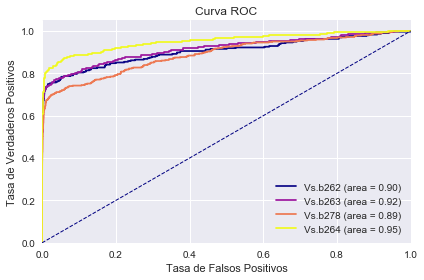

CPU times: user 33.8 s, sys: 260 ms, total: 34 s
Wall time: 33.7 s


In [19]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.98      0.64      0.78       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.95      0.63      0.75       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19931
          1       0.97      0.57      0.72       423

avg / total       0.99      0.99      0.99     20354

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

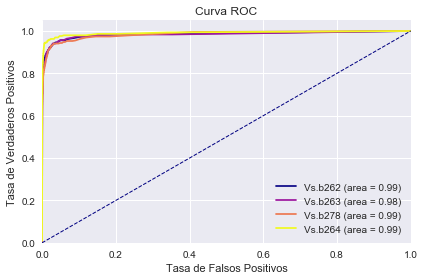

CPU times: user 2min 10s, sys: 688 ms, total: 2min 11s
Wall time: 2min 10s


In [20]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.93      0.40      0.56       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.91      0.38      0.54       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19931
          1       0.92      0.31      0.46       423

avg / total       0.98      0.99      0.98     20354

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

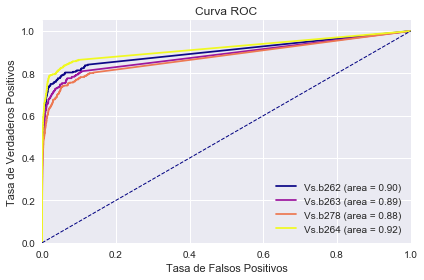

CPU times: user 7min 18s, sys: 272 ms, total: 7min 18s
Wall time: 7min 18s


In [21]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b261"))

## b278 + b261 vs. Los demas

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.54      0.69       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.87      0.52      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.91      0.56      0.69       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


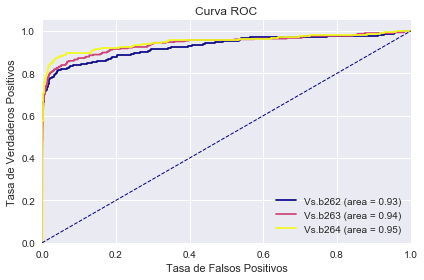

CPU times: user 3min 25s, sys: 1.22 s, total: 3min 26s
Wall time: 3min 25s


In [22]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.90      0.52      0.66       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.84      0.49      0.62       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.89      0.54      0.67       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


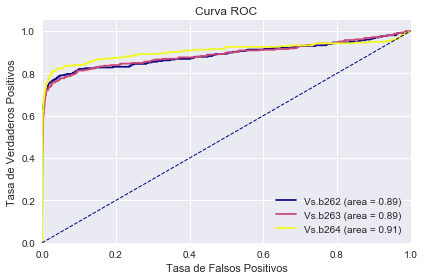

CPU times: user 2min 3s, sys: 1 s, total: 2min 4s
Wall time: 2min 4s


In [23]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.54      0.69       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.91      0.51      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.95      0.56      0.71       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


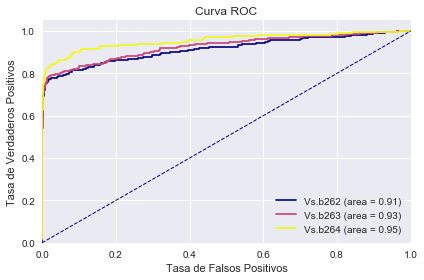

CPU times: user 2min 18s, sys: 920 ms, total: 2min 19s
Wall time: 2min 19s


In [24]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19951
          1       0.97      0.69      0.80       296

avg / total       1.00      1.00      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19988
          1       0.94      0.69      0.79       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19995
          1       0.95      0.75      0.84       294

avg / total       1.00      1.00      1.00     20289

--------------------------------------------------------------------------------


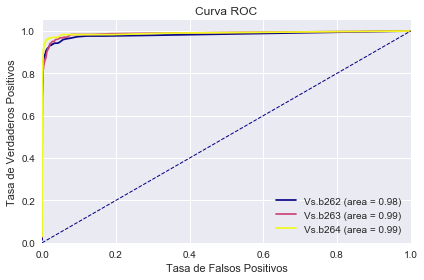

CPU times: user 3min 43s, sys: 520 ms, total: 3min 43s
Wall time: 3min 43s


In [25]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.85      0.46      0.59       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.85      0.43      0.57       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.87      0.49      0.63       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


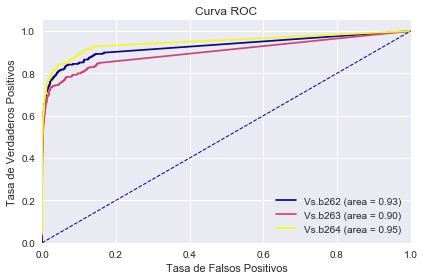

CPU times: user 11min 33s, sys: 324 ms, total: 11min 33s
Wall time: 11min 33s


In [26]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261"]))

## b278 + b261 + b264 vs. Los demas

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.94      0.56      0.70       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.87      0.53      0.66       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


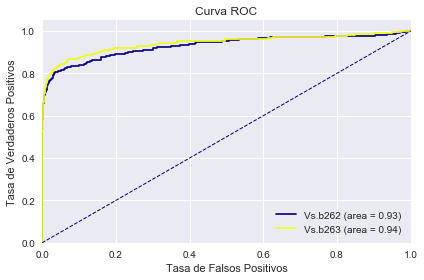

CPU times: user 5min 10s, sys: 1.42 s, total: 5min 11s
Wall time: 5min 11s


In [27]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.88      0.54      0.67       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.85      0.52      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


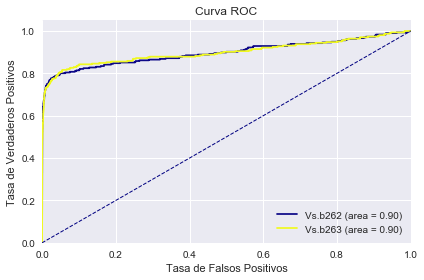

CPU times: user 3min 2s, sys: 1.21 s, total: 3min 3s
Wall time: 3min 3s


In [28]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.55      0.70       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.91      0.54      0.67       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


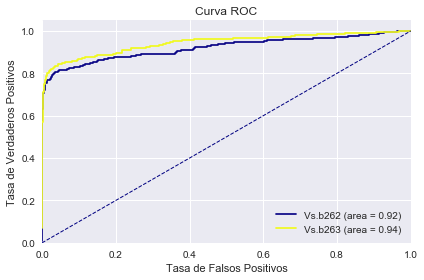

CPU times: user 3min 11s, sys: 1.28 s, total: 3min 12s
Wall time: 3min 12s


In [29]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19951
          1       0.97      0.71      0.82       296

avg / total       1.00      1.00      1.00     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19988
          1       0.94      0.70      0.80       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


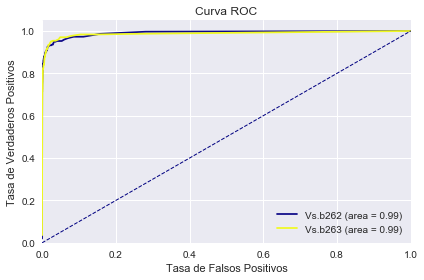

CPU times: user 3min 56s, sys: 432 ms, total: 3min 56s
Wall time: 3min 56s


In [30]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.88      0.50      0.64       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.84      0.48      0.61       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


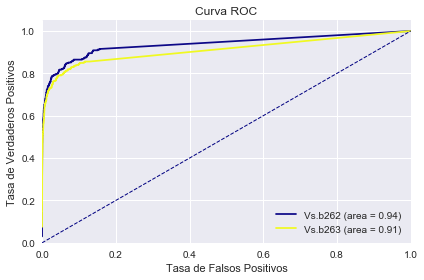

CPU times: user 11min 7s, sys: 248 ms, total: 11min 7s
Wall time: 11min 7s


In [31]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261", "b264"]))